# Predicting Loan Defaulters

# Author : Vinay Salve

***Objective : determine and examine factors that affect the ratio of vehicle loan defaulters. Also, to use the findings to create a model to predict the potential defaulters***

## Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=False)

## Reading the data

In [3]:
df=pd.read_csv('loandefault.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,01-06-1988,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,14-07-1994,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


## Lets check for null values

In [4]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

## Checking the duplicate values present in the dataset

In [5]:
df.duplicated().sum()

0

## Renaming the columns

In [6]:
df.rename(columns={"Employment.Type":"Emp_type","Date.of.Birth":"DOB",
                      "PERFORM_CNS.SCORE":"perf_cns_score",
                      "PERFORM_CNS.SCORE.DESCRIPTION":"perf_cns_Score_desc",
                      "PRI.NO.OF.ACCTS":"pri_no_of_accts","PRI.ACTIVE.ACCTS":"pri_act_accts",
                      "PRI.OVERDUE.ACCTS":"pri_over_accts","PRI.CURRENT.BALANCE":"pri_cur_bal",
                      "PRI.SANCTIONED.AMOUNT":"pri_sanc_amt","PRI.DISBURSED.AMOUNT":"pri_disb_amt", 
                      "SEC.NO.OF.ACCTS":"sec_no_of_accts", "SEC.ACTIVE.ACCTS":"sec_act_acts",
                      "SEC.OVERDUE.ACCTS":"sec_over_accts",
                      "SEC.CURRENT.BALANCE":"sec_cur_bal","SEC.SANCTIONED.AMOUNT":"sec_sanc_amnt",
                      "SEC.DISBURSED.AMOUNT":"sec_disb_amnt","PRIMARY.INSTAL.AMT":"prim_install","SEC.INSTAL.AMT":"sec_inst_amt",

                      "NEW.ACCTS.IN.LAST.SIX.MONTHS":"new_acct_last_six_months",
                      "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"del_acct_last_six_month",
                      "AVERAGE.ACCT.AGE":"avg_accts_age","CREDIT.HISTORY.LENGTH":"cred_hist_len",
                      "NO.OF_INQUIRIES":"no_of_enq"},inplace=True)

### Checking the Count of values present in the Emp_type attribute in datasets

In [7]:
df['Emp_type'].value_counts()

Self employed    127635
Salaried          97858
Name: Emp_type, dtype: int64

### Filling the missing values in the Emp_type attribute of dataset
**Employement Type has two types of Employment i.e Self employed and Salaried**

**The empty values are for those people who dont work at all**

**let's fill Unemployed in the place of Null values**


In [8]:
df['Emp_type'].fillna('Unemployed', inplace = True)

**let's check if there are any null values still left**

In [9]:
df.isnull().sum()

UniqueID                    0
disbursed_amount            0
asset_cost                  0
ltv                         0
branch_id                   0
supplier_id                 0
manufacturer_id             0
Current_pincode_ID          0
DOB                         0
Emp_type                    0
DisbursalDate               0
State_ID                    0
Employee_code_ID            0
MobileNo_Avl_Flag           0
Aadhar_flag                 0
PAN_flag                    0
VoterID_flag                0
Driving_flag                0
Passport_flag               0
perf_cns_score              0
perf_cns_Score_desc         0
pri_no_of_accts             0
pri_act_accts               0
pri_over_accts              0
pri_cur_bal                 0
pri_sanc_amt                0
pri_disb_amt                0
sec_no_of_accts             0
sec_act_acts                0
sec_over_accts              0
sec_cur_bal                 0
sec_sanc_amnt               0
sec_disb_amnt               0
prim_insta

## Let's check the employement type in the data

In [10]:
df['Emp_type'].value_counts()

Self employed    127635
Salaried          97858
Unemployed         7661
Name: Emp_type, dtype: int64

In [11]:
cf.set_config_file(theme='polar')
contract_val = df['Emp_type'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                   'values': contract_val.values
                  })
contract_df.iplot(kind='pie',labels='labels',values='values', title='Types of Employment', hole = 0.6)

# Distribution of target variable

***check the distribution of disbursed amount, asset cost and ltv***


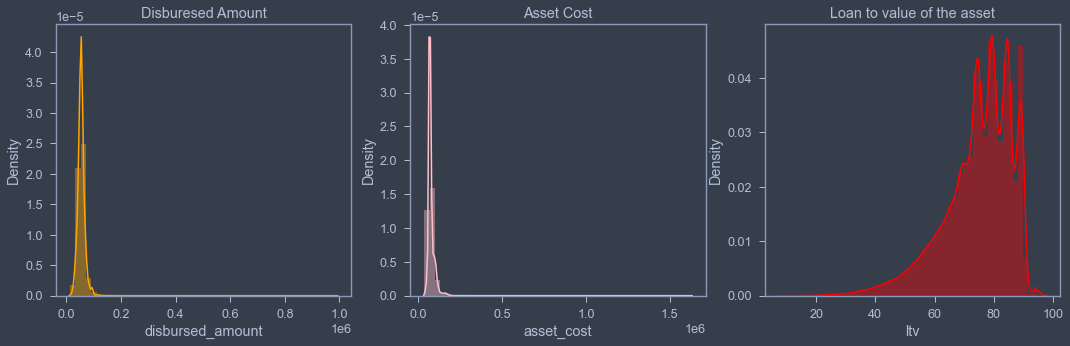

In [12]:
plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(df['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

**Performing log transformations on disbursed amount, ltv, and asset cost**

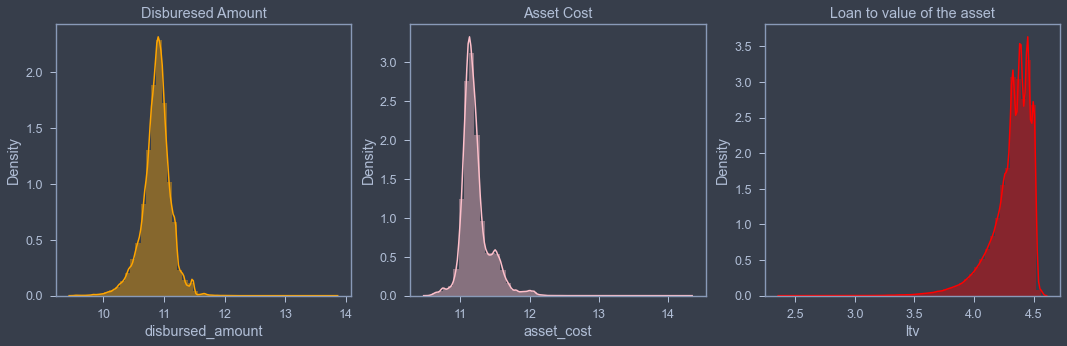

In [13]:

df['disbursed_amount'] = np.log1p(df['disbursed_amount'])
df['ltv'] = np.log1p(df['ltv'])
df['asset_cost'] = np.log1p(df['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(df['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(df['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(df['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

**Extracting just year from Date of Birth**

**let's first convert the date into date-time format**

Text(0.5, 1.0, 'Distribution of Year of birth')

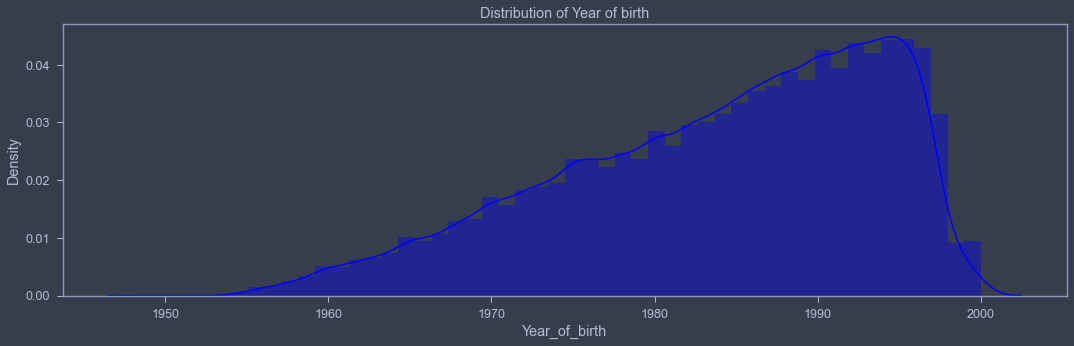

In [14]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format

df['DOB'] = pd.to_datetime(df['DOB'], errors = 'coerce')

# extracting the year of birth of the customers
df['Year_of_birth'] = df['DOB'].dt.year

# checking the values inside date of year
sns.distplot(df['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

# Credit bureau score distribution

**changing the credit history format from months to years**

In [15]:
df['cred_hist_len'] = df['cred_hist_len'].apply(lambda x: x.split(' ')[0])
df['cred_hist_len'] = df['cred_hist_len'].apply(lambda x: x.split('yrs')[0])

**distribution of credit history years**

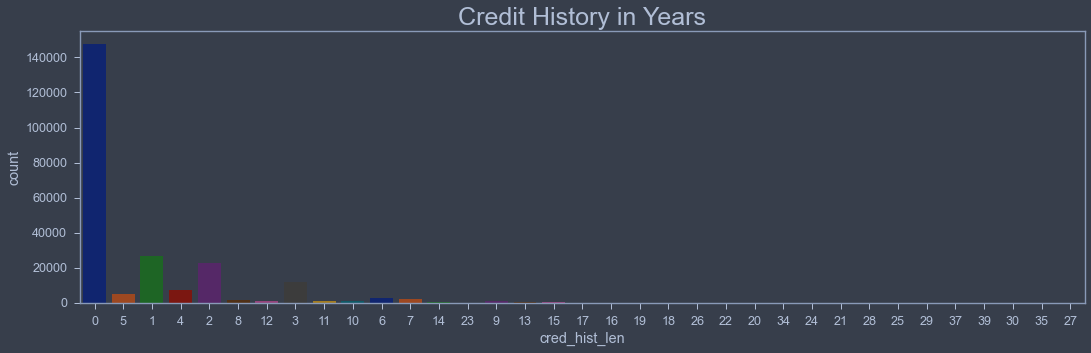

In [16]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['cred_hist_len'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

## The distribution of age w.r.t. to the defaulters and non-defaulters

**changing the average account age format from months to year**

In [17]:
df['avg_accts_age'] = df['avg_accts_age'].apply(lambda x: x.split(' ')[0])
df['avg_accts_age'] = df['avg_accts_age'].apply(lambda x: x.split('yrs')[0])

**loans defaulted in last six months**

In [18]:
df['del_acct_last_six_month'].value_counts()

0     214959
1      14941
2       2470
3        537
4        138
5         58
6         20
7         13
8          7
11         3
12         3
9          2
10         2
20         1
Name: del_acct_last_six_month, dtype: int64

**new loans taken by the customer before disbursement**

In [19]:
df['new_acct_last_six_months'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
21         1
22         1
28         1
35         1
Name: new_acct_last_six_months, dtype: int64

(array([0]), [Text(0, 0, '0')])

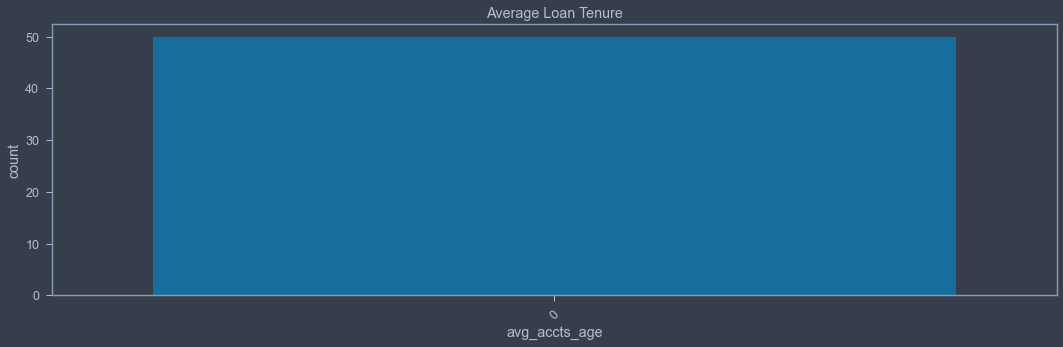

In [20]:
sns.countplot(df['avg_accts_age'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '0'),
  Text(2, 0, '4'),
  Text(3, 0, '3'),
  Text(4, 0, '2')])

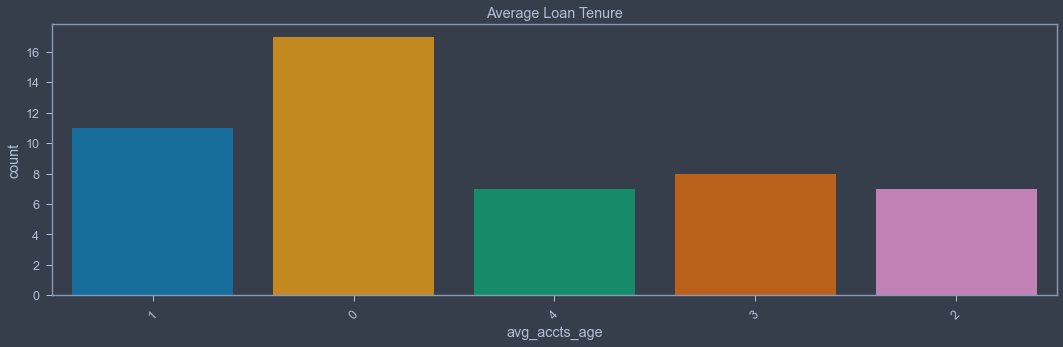

In [21]:
sns.countplot(df['avg_accts_age'].tail(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

## Type of ID presented by most of the customers for proof

In [22]:
df['Aadhar_flag'].value_counts()

1    195924
0     37230
Name: Aadhar_flag, dtype: int64

In [23]:
    df['PAN_flag'].value_counts()

0    215533
1     17621
Name: PAN_flag, dtype: int64

In [24]:
df['Passport_flag'].value_counts()

0    232658
1       496
Name: Passport_flag, dtype: int64

In [25]:
df['Driving_flag'].value_counts()

0    227735
1      5419
Name: Driving_flag, dtype: int64

In [26]:
df['VoterID_flag'].value_counts()

0    199360
1     33794
Name: VoterID_flag, dtype: int64

In [27]:
df['MobileNo_Avl_Flag'].value_counts()

1    233154
Name: MobileNo_Avl_Flag, dtype: int64

### As we can see passport id was presented the most 

**lets extract features from disbursal dates**

**as all  the disbursement dates are of year 2018 so we can extract the months**


In [28]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
df['DisbursalMonth'] = df['DisbursalDate'].dt.month

df['DisbursalMonth'].value_counts()

10    84875
8     56975
9     54443
11     6709
6      5991
12     5613
3      5148
4      4627
7      4150
5      2890
1      1708
2        25
Name: DisbursalMonth, dtype: int64

# checking the bureau score description

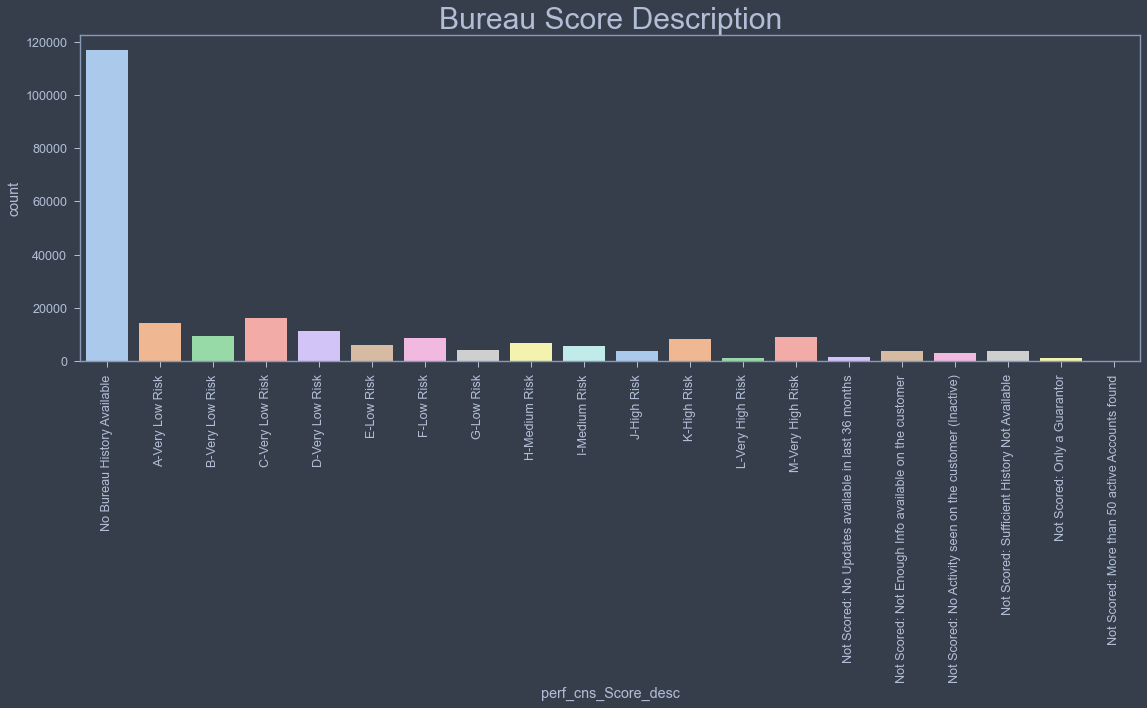

In [29]:
plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(df['perf_cns_Score_desc'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

***checking the perform cns score description***


In [30]:
df['perf_cns_Score_desc'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

***encodings for bureau score(perform cns score distribution***


In [31]:
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('No Bureau History Available', 0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: Sufficient History Not Available', 0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: Not Enough Info available on the customer', 0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: No Updates available in last 36 months', 0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: Only a Guarantor', 0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('Not Scored: More than 50 active Accounts found',0)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('M-Very High Risk', 1)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('L-Very High Risk', 1)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('K-High Risk', 2)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('J-High Risk', 2)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('I-Medium Risk', 3)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('H-Medium Risk', 3)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('G-Low Risk', 4)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('F-Low Risk', 4)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('E-Low Risk', 4)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('D-Very Low Risk', 5)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('C-Very Low Risk', 5)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('B-Very Low Risk', 5)
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
df['perf_cns_Score_desc'].value_counts()


0    129785
5     50728
4     18294
3     12412
2     12025
1      9910
Name: perf_cns_Score_desc, dtype: int64

***checking the bureau score***


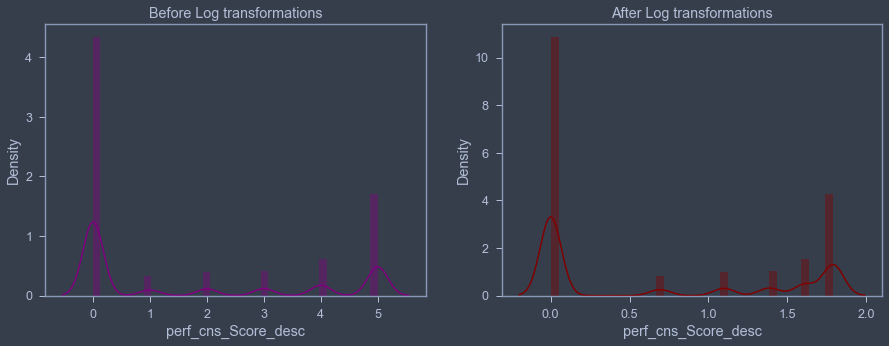

In [32]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(df['perf_cns_Score_desc'], color = 'purple')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
df['perf_cns_Score_desc'] = np.log1p(df['perf_cns_Score_desc'])
sns.distplot(df['perf_cns_Score_desc'], color = 'maroon')
plt.title('After Log transformations')

plt.show()

## Exploring the primary and secondary account details

***EMI Amount of the Secondary Plan***


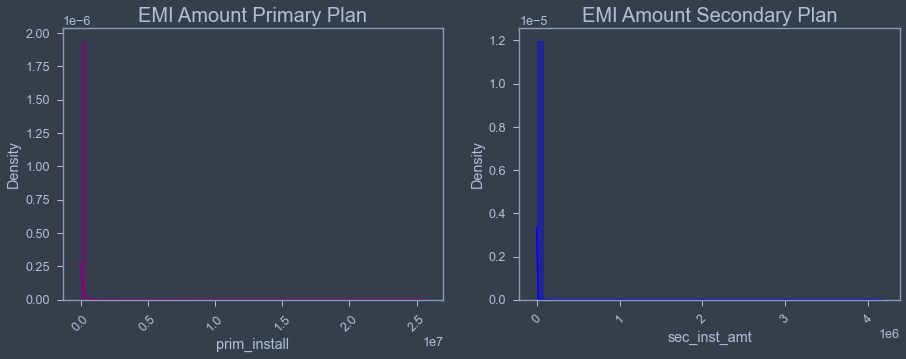

In [33]:
plt.subplot(1, 2, 1)
sns.distplot(df['prim_install'], color = 'Purple')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(df['sec_inst_amt'], color = 'Blue')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

***let's apply log transformations on EMI Amount of the Primary Loan and Secondary loan***


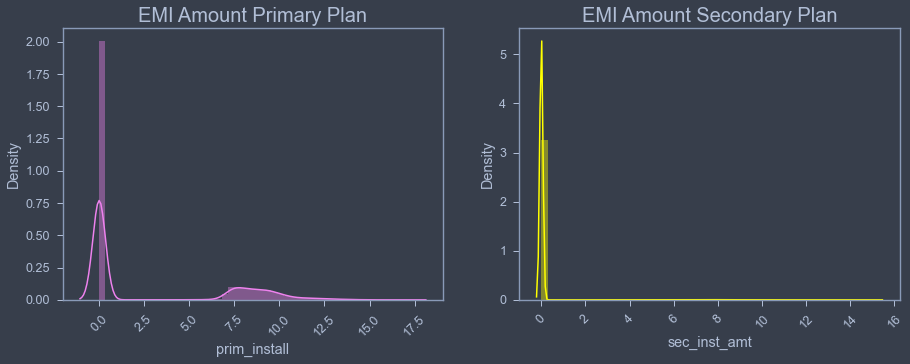

In [34]:
df['prim_install'] = np.log1p(df['prim_install'])
df['sec_inst_amt'] = np.log1p(df['sec_inst_amt'])

plt.subplot(1, 2, 1)
sns.distplot(df['prim_install'],color = 'Violet')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(df['sec_inst_amt'], color = 'yellow')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

***distribution for different attributesof secondary accounts***


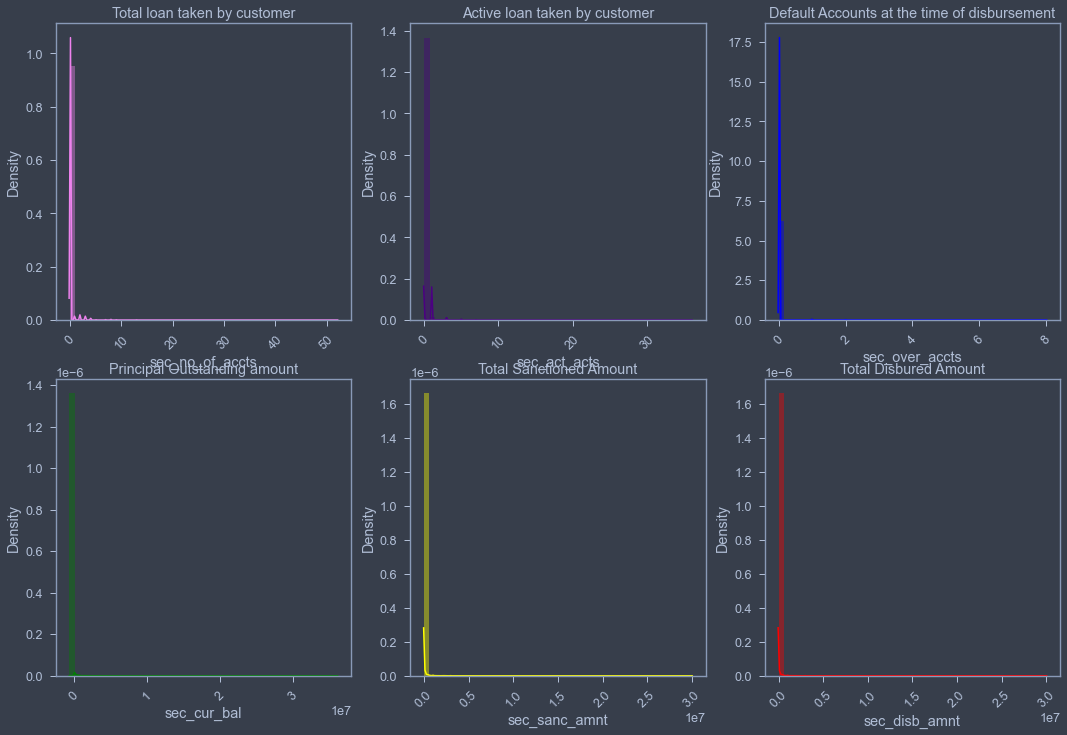

In [35]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(df['sec_no_of_accts'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(df['sec_act_acts'], color = 'indigo')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(df['sec_over_accts'], color = 'blue')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(df['sec_cur_bal'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(df['sec_sanc_amnt'], color = 'yellow')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(df['sec_disb_amnt'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

***applying log transformation to all these attributes***


In [36]:
df['sec_no_of_accts'] = np.log1p(df['sec_no_of_accts'])
df['sec_act_acts'] = np.log1p(df['sec_act_acts'])
df['sec_over_accts'] = np.log1p(df['sec_over_accts'])
#data['SEC.CURRENT.BALANCE'] = np.log1p(data['SEC.CURRENT.BALANCE'])
df['sec_sanc_amnt'] = np.log1p(df['sec_sanc_amnt'])
df['sec_disb_amnt'] = np.log1p(df['sec_disb_amnt'])

#  filling  missing values in sec.current.balance
df['sec_cur_bal'].fillna(df['sec_cur_bal'].mean(), inplace = True)


***distribution for different attributes of secondary accounts after log transformation***


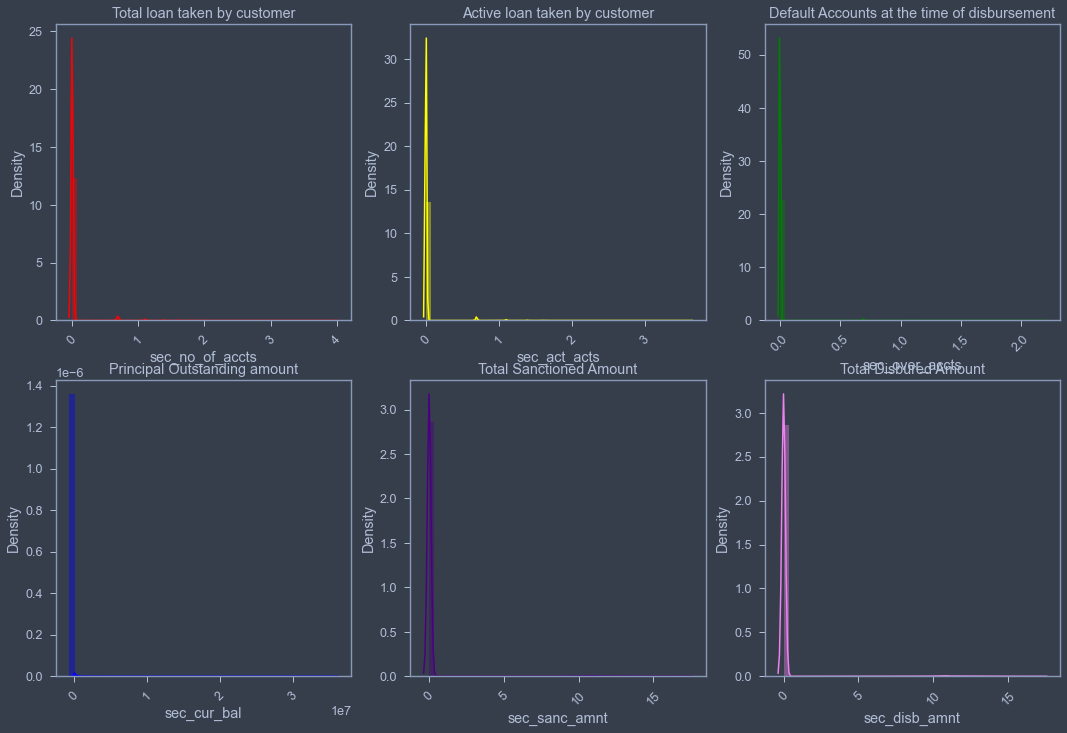

In [37]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(df['sec_no_of_accts'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(df['sec_act_acts'], color = 'yellow')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(df['sec_over_accts'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(df['sec_cur_bal'], color = 'blue')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(df['sec_sanc_amnt'], color = 'indigo')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(df['sec_disb_amnt'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

***applying log transformations to the primary account attributes***


In [38]:

df['pri_no_of_accts'] = np.log1p(df['pri_no_of_accts'])
df['pri_act_accts'] = np.log1p(df['pri_act_accts'])
df['pri_over_accts'] = np.log1p(df['pri_over_accts'])
#df['PRI.CURRENT.BALANCE'] = np.log1p(df['PRI.CURRENT.BALANCE'])
#df['PRI.SANCTIONED.AMOUNT'] = np.log1p(df['PRI.SANCTIONED.AMOUNT'])
df['pri_disb_amt'] = np.log1p(df['pri_disb_amt'])


#  filling  missing values in sec.current.balance
df['pri_cur_bal'].fillna(df['pri_cur_bal'].mean(), inplace = True)
df['pri_sanc_amt'].fillna(df['pri_sanc_amt'].mean(), inplace = True)


***plotting distribution plots for these attributes after log transformations***

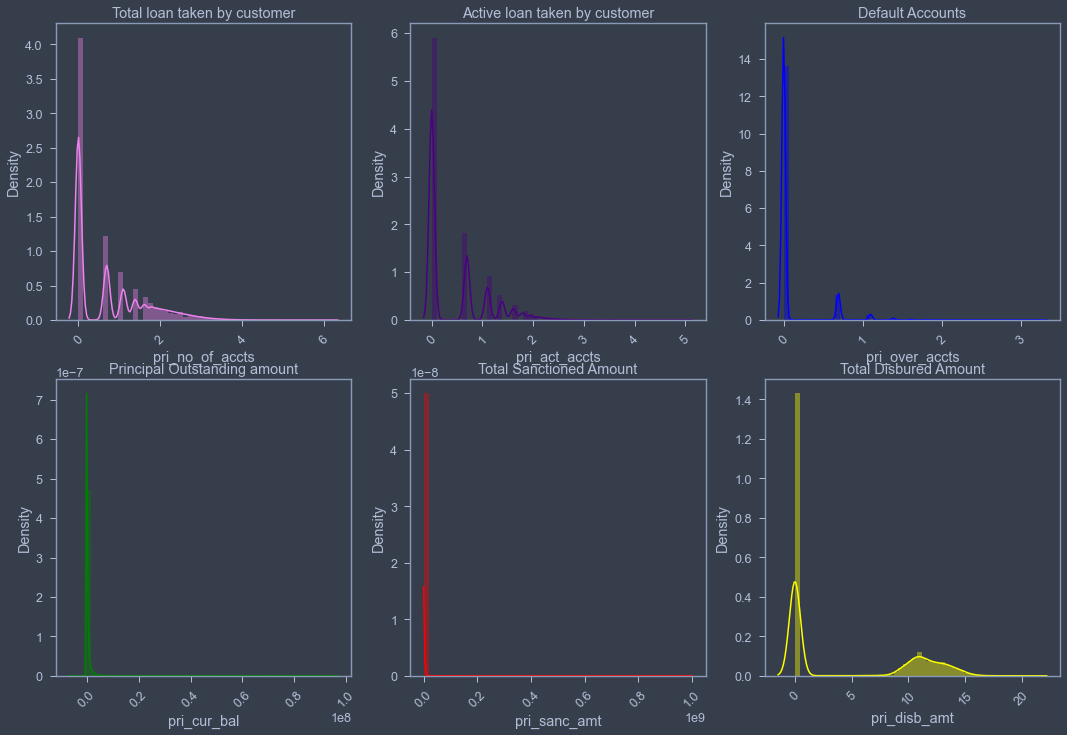

In [39]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(df['pri_no_of_accts'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(df['pri_act_accts'], color = 'indigo')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(df['pri_over_accts'], color = 'blue')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(df['pri_cur_bal'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(df['pri_sanc_amt'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(df['pri_disb_amt'], color = 'yellow')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

***plotting number of enquiries***

Text(0.5, 1.0, 'No. of Inquiries')

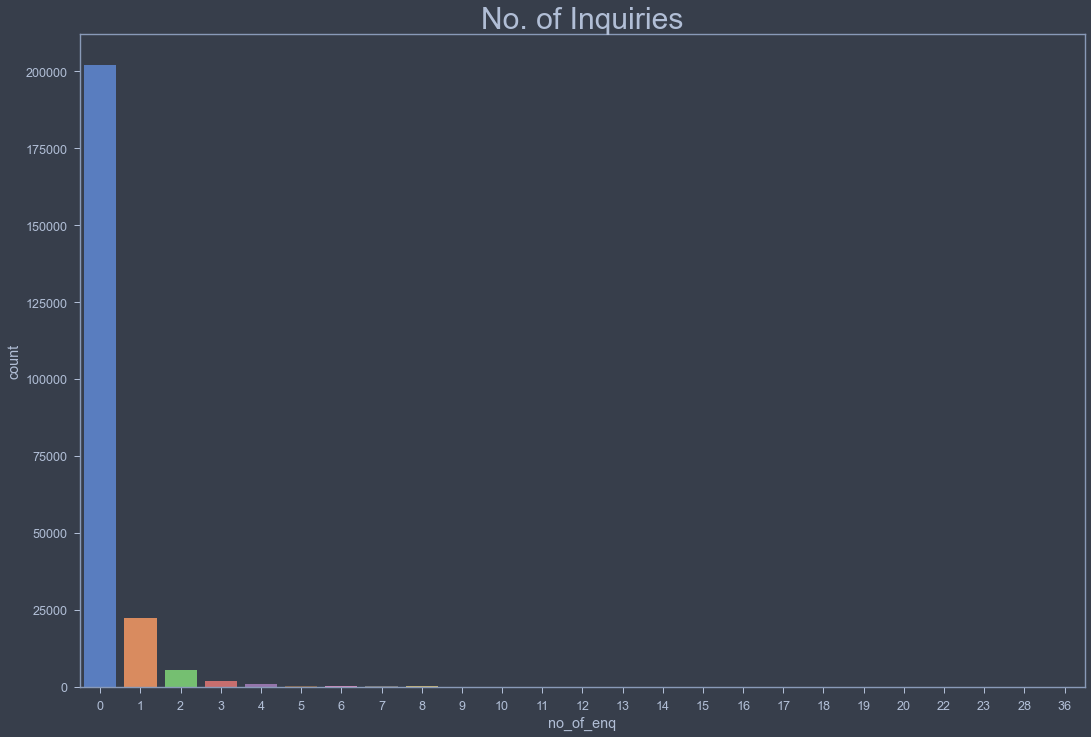

In [40]:
sns.countplot(df['no_of_enq'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

# Plotting countplot for credit history of users

***changing the credit history format from months to years***
***as no of years are more important***


In [41]:
df['cred_hist_len'] = df['cred_hist_len'].apply(lambda x: x.split(' ')[0])
df['cred_hist_len'] = df['cred_hist_len'].apply(lambda x: x.split('yrs')[0])
#df['CREDIT.HISTORY.LENGTH'].value_counts()

(array([0]), [Text(0, 0, '0')])

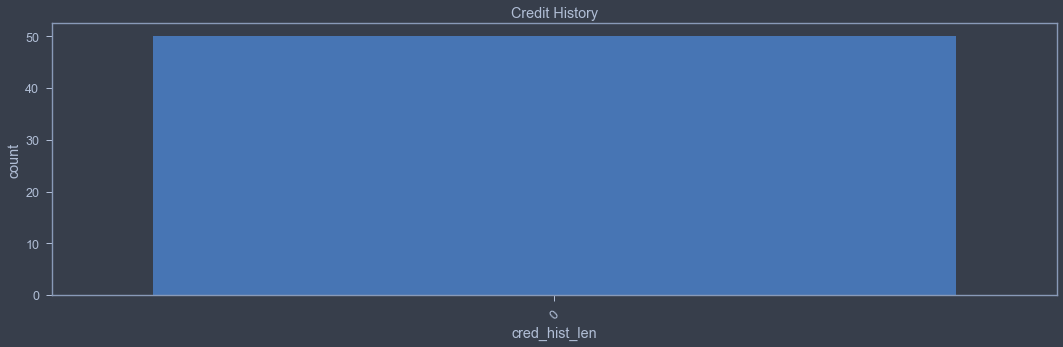

In [42]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['cred_hist_len'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2'),
  Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '3')])

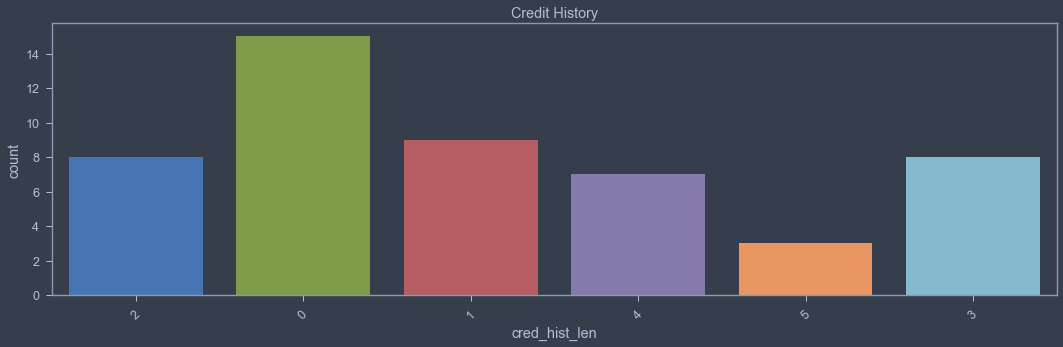

In [43]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['cred_hist_len'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

***distribution of credit history years***

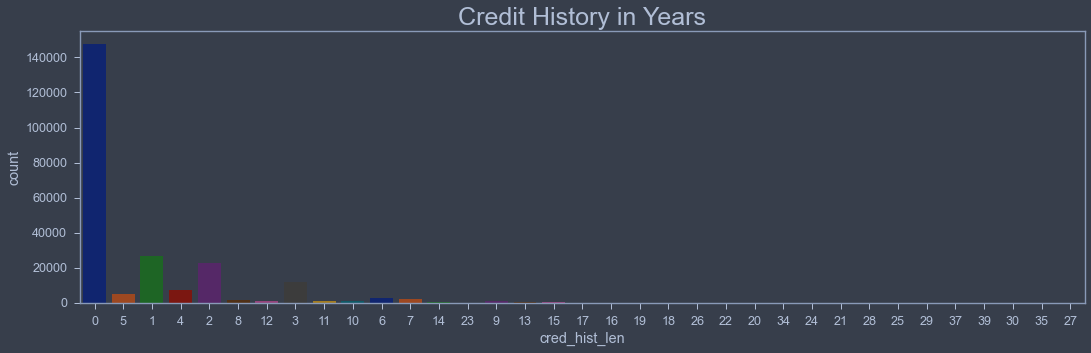

In [44]:
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(df['cred_hist_len'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

***removing unnecassary columns***

In [45]:
df = df.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'DOB', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

# checking the new columns of data
df.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Emp_type', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'perf_cns_score',
       'perf_cns_Score_desc', 'pri_no_of_accts', 'pri_act_accts',
       'pri_over_accts', 'pri_cur_bal', 'pri_sanc_amt', 'pri_disb_amt',
       'sec_no_of_accts', 'sec_act_acts', 'sec_over_accts', 'sec_cur_bal',
       'sec_sanc_amnt', 'sec_disb_amnt', 'prim_install', 'sec_inst_amt',
       'new_acct_last_six_months', 'del_acct_last_six_month', 'avg_accts_age',
       'cred_hist_len', 'no_of_enq', 'loan_default', 'Year_of_birth',
       'DisbursalMonth'],
      dtype='object')

***Applying Label Encoder to columns of categorical value***

In [46]:
df['Emp_type'] = df['Emp_type'].astype('category')
df['perf_cns_Score_desc'] = df['perf_cns_Score_desc'].astype('category')
df['avg_accts_age'] = df['avg_accts_age'].astype('category')
df['cred_hist_len'] = df['cred_hist_len'].astype('category')

le = LabelEncoder()
df['Emp_type'] = le.fit_transform(df['Emp_type'])
df['perf_cns_Score_desc'] = le.fit_transform(df['perf_cns_Score_desc'])
df['avg_accts_age'] = le.fit_transform(df['avg_accts_age'])
df['cred_hist_len'] = le.fit_transform(df['cred_hist_len'])

***Seperating target variable to perform train, test split***

In [47]:
X=df.drop('loan_default',axis=1)
X.head()

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Emp_type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,sec_disb_amnt,prim_install,sec_inst_amt,new_acct_last_six_months,del_acct_last_six_month,avg_accts_age,cred_hist_len,no_of_enq,Year_of_birth,DisbursalMonth
0,10.831292,10.975088,4.505902,67,45,0,6,1,1,0,...,0.0,0.0,0.0,0,0,0,0,0,1984,3
1,10.883298,11.024530,4.506785,67,45,1,6,1,1,0,...,0.0,0.0,0.0,0,0,0,0,0,1985,1
2,10.866261,11.007104,4.493009,67,45,1,6,1,1,0,...,0.0,0.0,0.0,0,0,0,0,1,1977,9
3,10.743977,11.026809,4.349245,67,45,0,6,1,1,0,...,0.0,0.0,0.0,0,0,0,0,0,1988,9
4,10.682698,11.267754,4.069027,67,86,1,6,1,1,0,...,0.0,0.0,0.0,0,0,0,0,0,1994,8


In [48]:
X.shape

(233154, 36)

In [49]:
Y=df['loan_default']
Y.head()

0    0
1    0
2    1
3    0
4    0
Name: loan_default, dtype: int64

In [50]:
Y.shape

(233154,)

***Applying train, test split***

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [52]:
df = pd.concat([X, Y], axis = 0)


***checking the target variable***

In [53]:
Y_train.value_counts()


0    146092
1     40431
Name: loan_default, dtype: int64

***there is a big difference in the no. of values for 1 and 0***
***so we can apply SMOTE or over-sampling***
***that means replicating the samples of 1 to lessen the parity between 0 and 1 values***

***separating train and test datasets from data***

In [54]:
x_train = df.iloc[:233154,:]
x_test = df.iloc[233154:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 37)
Shape of test : (233154, 37)


***applying SMOTE***

In [55]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

x_resample, y_resample = oversample.fit_resample(X_train, Y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (292184, 36)
Shape of y: (292184,)


***train and valid sets from train***


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(233747, 36)
(233747,)
(58437, 36)
(58437,)


***applying standardization***


In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(X_test)

***RANDOM FOREST CLASSIFIER***


Training Accuracy:  0.9996676013145832
Testing Accuarcy:  0.5021989492958229
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     29347
           1       0.50      0.00      0.00     29090

    accuracy                           0.50     58437
   macro avg       0.50      0.50      0.33     58437
weighted avg       0.50      0.50      0.34     58437



<AxesSubplot:>

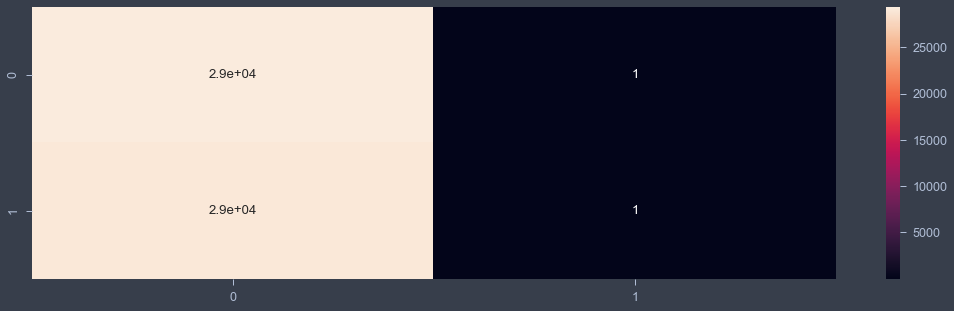

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(X_train, Y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

***getting the avg precision score***


In [59]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.4978011262954214


***plotting an AUC ROC Curve***


(0.0, 1.0)

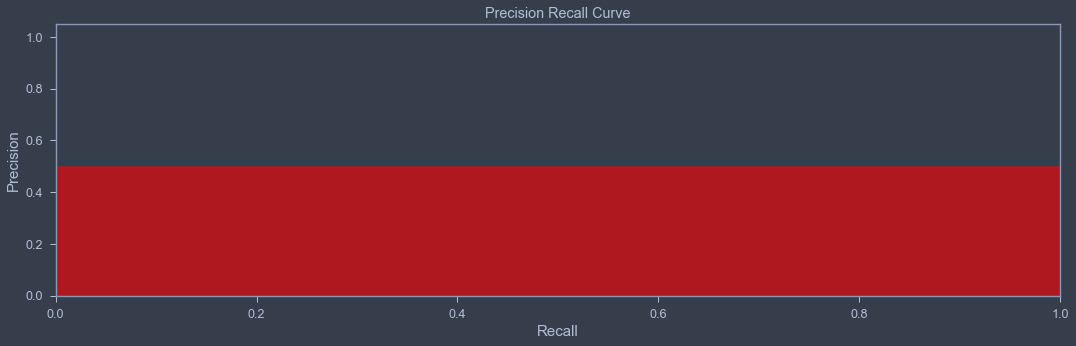

In [60]:
from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

***ADA BOOST CLASSIFIER***


Training Accuracy:  0.7830079936522574
Testing Accuarcy:  0.5021989492958229
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     29347
           1       0.00      0.00      0.00     29090

    accuracy                           0.50     58437
   macro avg       0.25      0.50      0.33     58437
weighted avg       0.25      0.50      0.34     58437



<AxesSubplot:>

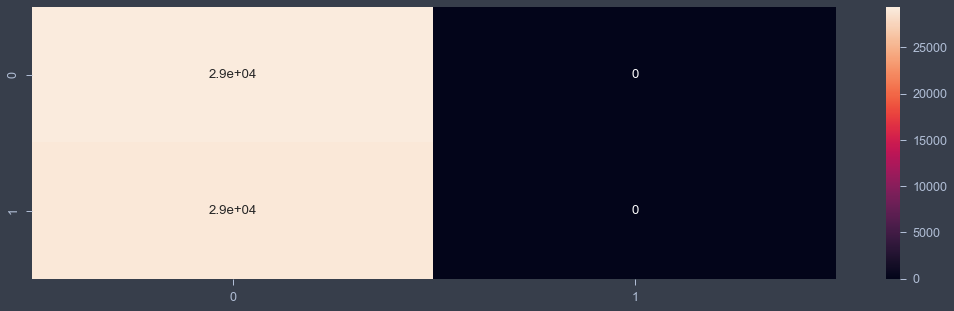

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(X_train, Y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(X_train, Y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

***getting the avg precision score***


In [62]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.49780105070417713


***plotting an AUC ROC Curve***


(0.0, 1.0)

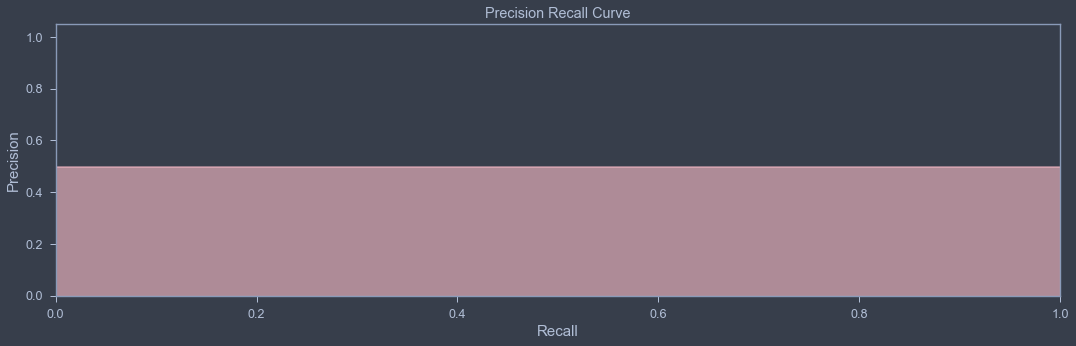

In [63]:

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

***Xg-Boost Classifier***


[19:21:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.7921864863850571
Testing Accuarcy:  0.4954737580642401
              precision    recall  f1-score   support

           0       0.50      0.96      0.66     29347
           1       0.39      0.02      0.05     29090

    accuracy                           0.50     58437
   macro avg       0.45      0.49      0.35     58437
weighted avg       0.45      0.50      0.35     58437



<AxesSubplot:>

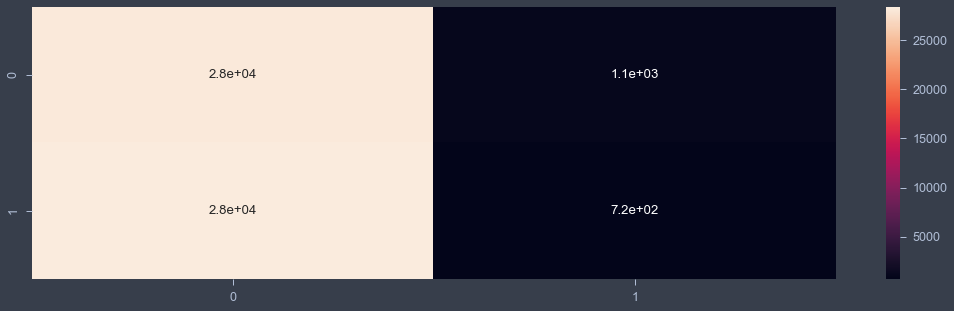

In [64]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier()
model_xgb.fit(X_train, Y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(X_train, Y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

***getting the avg precision score***


In [65]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.495202161078056


***plotting an AUC ROC Curve***


(0.0, 1.0)

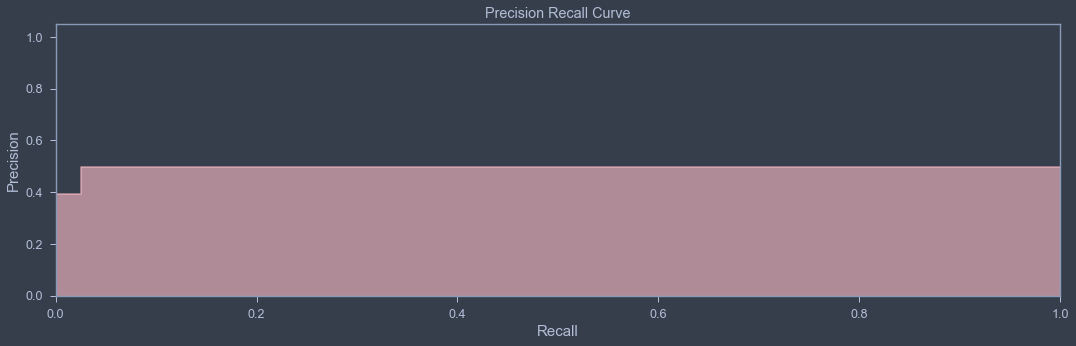

In [66]:
from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

***light boost classifier***


Training Accuracy:  0.7850452759177152
Testing Accuarcy:  0.5021989492958229
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     29347
           1       0.00      0.00      0.00     29090

    accuracy                           0.50     58437
   macro avg       0.25      0.50      0.33     58437
weighted avg       0.25      0.50      0.34     58437



<AxesSubplot:>

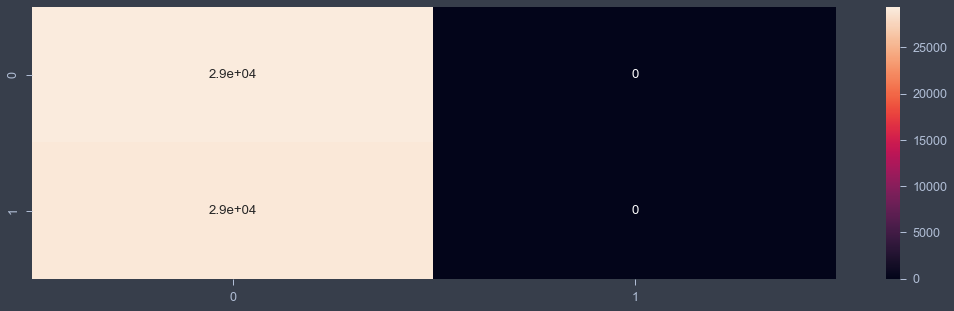

In [67]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(X_train, Y_train)

y_pred = model_lgb.predict(x_valid)

print("Training Accuracy: ", model_lgb.score(X_train, Y_train))
print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

***getting the avg precision score***

In [68]:
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.49780105070417713


***plotting an AUC ROC Curve***


(0.0, 1.0)

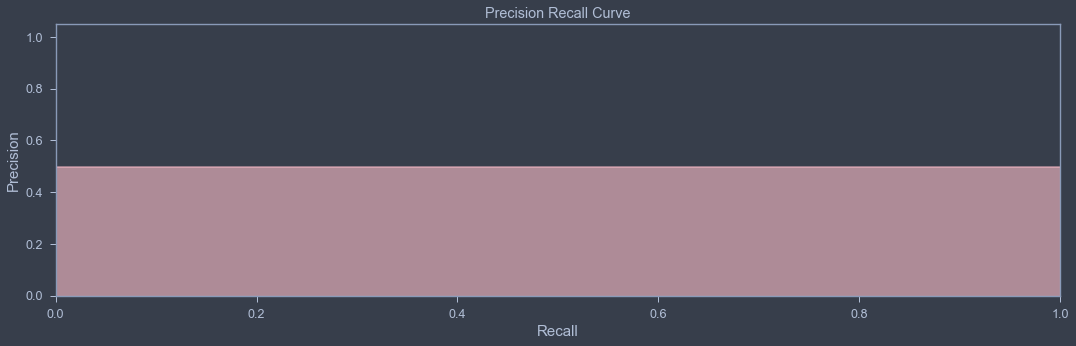

In [69]:

from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

***let's plot the feature importance plot for the lg boost model***


<AxesSubplot:ylabel='name'>

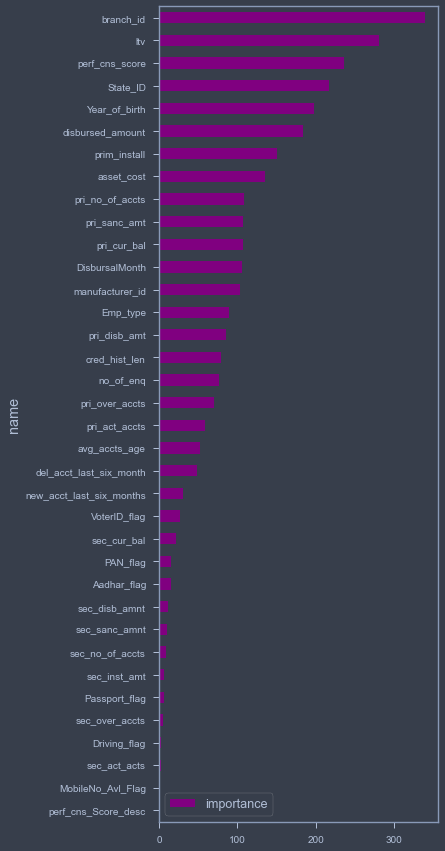

In [70]:
feature = pd.DataFrame()
x_train = pd.DataFrame(X_train)

feature['name'] = X_train.columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

***let's predict for the tests set***


In [71]:
y_pred_rf = model_rf.predict(X_test)
y_pred_ada = model_ada.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_lgb = model_lgb.predict(X_test)

***Boosting***

***as random forest and lgboost performed better than adaboost and xgboost***
 
***so we prefer to give lgbbost and randomforest more importance***


In [72]:
predictions = y_pred_rf*0.3 + y_pred_ada*0.2 + y_pred_xgb*0.2 + y_pred_xgb*0.3

In [73]:
#  let's create a submission file

#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgb})

#Visualize the first 5 rows
submission.head()

NameError: name 'unique_id' is not defined

In [ ]:
predictions